In [34]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols, glm
import statsmodels.api as sm

crab = pd.read_csv("../../data/crab.csv")
salary = pd.read_csv('../../data/salary.csv')
wells = pd.read_csv("../../data/wells.csv")

## Compute odds and probabilities
### In this exercise you will review the concept of odds and their relationship to probabilities.
### Recall the formulas from the video: [formula not included] and odds in terms of probabilities

### Instructions
-    An athlete competes in 60 races and wins 15 times.
-    Compute and print the odds of winning.

In [35]:
# Compute the odds
odds = 15/60/(1-15/60)

# Print the result
print('Odds are: ', round(odds,3))

Odds are:  0.333


-    An athlete competes in 60 races and wins 15 times.
-    Compute and print the probability of winning.

In [36]:
# Compute the probability
probability = 15/60

# Print the result
print('Probability is: ', round(probability,3))

Probability is:  0.25


-    Compute and print the odds using the computed probabilities from previous exercise.

In [37]:
# Probability calculation
probability = 15/60

# Compute odds using probability calculation
odds_from_probs = probability/(1 - probability)

# Print the results
print(round(odds_from_probs, 3))

0.333


## Fit logistic regression
### In this exercise, you will continue with the data from the study on the contamination of ground water with arsenic in Bangladesh where you want to model the probability of switching the current well given the level of arsenic present in the well.

### Recall the dataset structure: [skipped image] Dataset wells is preloaded in the workspace.

### Instructions
-    Import statsmodels and glm.
-    Using glm() fit a logistic regression model where switch is predicted by arsenic.
-    Print model summary using .summary().

In [38]:
# Load libraries and functions
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit logistic regression model
model_GLM = glm(formula = "switch ~ arsenic",
                data = wells,
                family = sm.families.Binomial()).fit() 

# Print model summary
print(model_GLM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 switch   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     3008
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1997.3
Date:                Thu, 14 Mar 2024   Deviance:                       3994.6
Time:                        03:31:34   Pearson chi2:                 3.03e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03570
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3058      0.070     -4.340      0.0

## Coefficients in terms of odds
### Previously you have fitted a logistic regression model for the probability of switching the well given the arsenic levels. In this exercise, you will see how another variable distance100 relates to the probability of switching and interpreting the coefficient values in terms of odds.

### Recall that the logistic regression model is in terms of log odds, so to obtain by how much would the odds multiply given a unit increase in x you would exponentiate the coefficient estimates. This is also called odds ratio.

### Recall that odds are a ratio of event occurring to the event not occurring. For example, if the odds of winning a game are 1/2 or 1 to 2 (1:2), it means that for every one win there are 2 losses.

### The dataset wells is loaded in the workspace.

### Instructions
-    Import statsmodels library and glm function from statsmodels.formula.api. Also import numpyas np.
-    Using glm() fit a logistic regression model where switch is predicted by distance100.
-    Extract model coefficients using .params.
-    Compute the multiplicative effect on the odds using numpy exp() function.

In [39]:
# Load libraries and functions
import statsmodels.api as sm
from statsmodels.formula.api import glm
import numpy as np

# Fit logistic regression model
model_GLM = glm(formula = 'switch ~ distance100',
                data = wells,
                family = sm.families.Binomial()).fit() 

# Extract model coefficients
print('Model coefficients: \n', model_GLM.params)

# Compute the multiplicative effect on the odds
print('Odds: \n', np.exp(model_GLM.params))

Model coefficients: 
 Intercept      0.610812
distance100   -0.629081
dtype: float64
Odds: 
 Intercept      1.841926
distance100    0.533082
dtype: float64


## Rate of change in probability
### For the wells dataset you have already fitted a logistic regression model with the model formula switch ~ distance100 obtaining the following fit

### In this exercise you will use that model to understand how the estimated probability changes at a certain value of distance100, say 1.5 as depicted in the figure below. [figure skipped]  Recall the formulas for the inverse-logit (probability) [figure skipped] and the slope of the tangent line of the model fit at point : [figure skipped]

### Dataset wells and the model wells_GLM are loaded in the workspace.

## Instructions 1/3
-    Define x to be the distance100 value of 1.5.
-    Extract model coefficients and save them as intercept and slope respectively.

In [40]:
model_formula = 'switch ~ distance100'
link_function = sm.families.links.logit()
model_family = sm.families.Binomial(link = link_function)

wells_GLM = glm(formula = model_formula, 
                 data = wells, 
                 family = model_family).fit()

/opt/conda/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [41]:
# Define x at 1.5
x = 1.5

# Extract intercept & slope from the fitted model
intercept, slope = wells_GLM.params

-    Compute and print the estimated probability given x using the inverse-logit function. Note that numpy is preloaded as np.

In [42]:
# Define x at 1.5
x = 1.5

# Compute and print the estimated probability
est_prob = np.exp(intercept + slope*x)/(1+np.exp(intercept + slope*x))
print('Estimated probability at x = 1.5: ', round(est_prob, 4))

Estimated probability at x = 1.5:  0.4176


-    Compute and print the slope of the tangent line for parameter beta at x value.

In [43]:
# Define x at 1.5
x = 1.5

# Compute and print the estimated probability
est_prob = np.exp(intercept + slope*x)/(1+np.exp(intercept + slope*x))
print('Estimated probability at x = 1.5: ', round(est_prob, 4))

# Compute the slope of the tangent line for parameter beta at x
slope_tan = slope * est_prob * (1 - est_prob)
print('The rate of change in probability: ', round(slope_tan,4))

Estimated probability at x = 1.5:  0.4176
The rate of change in probability:  -0.153


## Statistical significance
### In the video we analyzed the horseshoe crab model by predicting y with weight. In this exercise you will assess the significance of the estimated coefficients but with width as explanatory variable instead.

### Recall that coefficients help us determine the significance of the relationship that we are trying to model, where a positive sign increases the probability of an event as the predictor increases and vice versa.

### The dataset crab is loaded in the workspace.

### Instructions 1/2
-    Import statsmodels library and glm function from statsmodels.formula api.
-    Fit a logistic regression model with y as the response and width as an explanatory variable.
-    Print model summary using .summary() to view model results.

In [44]:
# Import libraries and th glm function
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit logistic regression and save as crab_GLM
crab_GLM = glm('y ~ width', data = crab, family = sm.families.Binomial()).fit()

# Print model summary
print(crab_GLM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -97.226
Date:                Thu, 14 Mar 2024   Deviance:                       194.45
Time:                        03:31:35   Pearson chi2:                     165.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1655
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.3508      2.629     -4.698      0.0

## Computing Wald statistic
### In the previous exercise you fitted a model with width variable and assessed the relationship of the explanatory and response variable. In this exercise you will assess the significance of the width variable by computing the Wald statistic.

### Also note that in the model summary the Wald statistic is presented by the letter z which means that the value of a statistic follows a standard normal distribution. Recall the formula for the Wald statistic: [equiation skipped] where B^ is the estimated coefficient and SE its standard error.

### The fitted model crab_GLM and crab dataset have been preloaded in the workspace.

### Instructions
-    Using .params extract and print model coefficients and save as intercept and slope.
-    Save and print covariance matrix as crab_cov.
-    Compute and print the standard error std_error by extracting the relevant element using the covariance matrix.
-    Compute and print the Wald statistic.

In [45]:
# Extract coefficients
intercept, slope = crab_GLM.params

# Estimated covariance matrix: crab_cov
crab_cov = crab_GLM.cov_params()
print(crab_cov)

# Compute standard error (SE): std_error
std_error = np.sqrt(crab_cov.loc['width', 'width'])
print('SE: ', round(std_error, 4))

# Compute Wald statistic
wald_stat = slope/std_error
print('Wald statistic: ', round(wald_stat,4))

           Intercept     width
Intercept   6.910158 -0.266848
width      -0.266848  0.010350
SE:  0.1017
Wald statistic:  4.8875


## Confidence intervals
### Continuing from the previous exercise you will now asses the uncertainty of the coefficients by computing the confidence intervals.

### Recall formulas for confidence intervals discussed in the video: [equation skipped], 95% confidence intervals for the parameter  [equation skipped], 95% confidence intervals for odds [equation skipped]

### The model crab_GLM and crab dataset are loaded in the workspace.

### Instructions 1/2
-    Extract and print confidence intervals from the fitted model using .conf_int() function.

In [46]:
# Extract and print confidence intervals
print(crab_GLM.conf_int())

                   0         1
Intercept -17.503010 -7.198625
width       0.297833  0.696629


-    Compute and print confidence intervals for the odds.

In [47]:
# Compute confidence intervals for the odds
print(np.exp(crab_GLM.conf_int()))

                      0         1
Intercept  2.503452e-08  0.000748
width      1.346936e+00  2.006975


## Visualize model fit using regplot()
### After having fitted and analyzed the model we can visualize it by plotting the observation points and the fitted logistic regression.

### Using the plot you can visually understand the relationship of the explanatory variable and the response for the range of values of the explanatory variable.

### We can use the regplot() function from the seaborn module for this. The regplot() function takes an argument logistic, which allows you to specify whether you wish to estimate the logistic regression model for the given data using True or False values. This will also produce the plot of the fit.

### Recall that the model that you fitted previously: [equation skipped]
 

### The dataset wells is already loaded in your workspace.

### Instructions
-    Using the data wells to plot arsenic on the x-axis and switch on the y-axis.
-    Apply y_jitter of 0.03 to spread the values of the response for easier visualization.
-    Use True for argument logistic for the plot to overlay the logistic function on the given data and set confidence intervals argument ci to None which will not display confidence interval, but it will speed up the computation.
-    Display the plot using the plt.show().

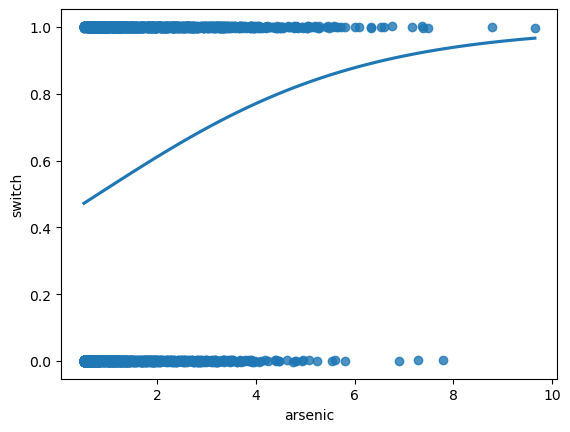

In [48]:
# Plot arsenic and switch and add overlay with the logistic fit
sns.regplot(x = 'arsenic', y = 'switch', 
            y_jitter = 0.003,
            data = wells, 
            logistic = True,
            ci = None)

# Display the plot
plt.show()

## Compute predictions
### Often, in practice, we are interested in using the fitted logistic regression to estimate the probabilities and construct confidence intervals for these estimates. Using the wells dataset and the model 'switch ~ arsenic' let's assume you have new observations wells_test which were not part of the training sample and you wish to predict the probability of switching to the nearest safe well.

### You will do this with the help of the .predict() method.

### Note that .predict() takes in several arguments: exog - new observations (test dataset), transform = True - passes the formula of the fit y ~ x to the data.  If exog is not defined the probabilities are computed for the training dataset.

### Model wells_fit and datasets wells and wells_test are preloaded in the workspace.

### Instructions
-    Using the fitted model wells_fit, compute prediction on test data wells_test and save as prediction.
-    Add prediction to the existing data frame wells_test and name the column prediction.
-    Using print() display the first 5 rows of wells_test with columns switch, arsenic and prediction. Use pandas function head() to view only the first 5 rows.

In [56]:
wells_test = wells[:200]
wells = wells[200:]

wells_fit = glm(formula = model_formula, 
                 data = wells, 
                 family = model_family).fit()

In [57]:
# Compute predictions for the test sample wells_test and save as prediction
prediction = wells_fit.predict(exog = wells_test)

# Add prediction to the existing data frame wells_test and assign column name prediction
wells_test['prediction'] = prediction

# Examine the first 5 computed predictions
print(wells_test[['switch', 'arsenic', 'prediction']].head())

     switch  arsenic  prediction
400       1     2.18    0.470113
401       1     4.77    0.461079
402       1     3.79    0.502060
403       1     3.48    0.502047
404       0     3.02    0.549739


/tmp/ipykernel_120247/14328586.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wells_test['prediction'] = prediction


## Compute confusion matrix
### As you learned in the video the logistic regression model generates two types of predictions, a continuous valued prediction, in the form of a probability, and a class prediction which in the example of the wells dataset is a discrete category with two classes.

### In the previous exercise you computed the continuous values prediction in the form of a probability. In this exercise you will use those values to assign a class to each observation in your wells_test sample. Finally you will describe the model using the confusion matrix.

### Computed predictions prediction and wells_test are loaded in your workspace.

### Instructions 1/3
-    Using computed predictions prediction, classify them into 0 and 1 class labels by using the cutoff set at 0.5 and save as y_prediction.

In [58]:
# Define the cutoff
cutoff = 0.5

# Compute class predictions: y_prediction
y_prediction = np.where(prediction > cutoff, 1, 0)

-    Extract column 'switch' from wells_test to obtain the actual class labels.
-    Using crosstab() compute the confusion matrix with rownames set to 'Actual', columnames set to 'Predicted' and margins set to True.
-    Print the results.

In [59]:
# Compute class predictions y_pred
y_prediction = np.where(prediction > cutoff, 1, 0)

# Assign actual class labels from the test sample to y_actual
y_actual = wells_test['switch']

# Compute and print confusion matrix using crosstab function
conf_mat = pd.crosstab(y_actual, y_prediction, 
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)
                      
# Print the confusion matrix
print(conf_mat)

Predicted   0    1  All
Actual                 
0          12   85   97
1           8   95  103
All        20  180  200
